In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [5]:
# read data using pandas
offspring_df = pd.read_csv("https://www.dropbox.com/s/g47l2r2kmjfzst2/aau1043_dnm.tsv?dl=1")
offspring_df

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26428,chr9,137633973,C,A,17904,mother,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [7]:
# parent data using pandas
parent_df = pd.read_csv("https://www.dropbox.com/s/vxc4tw1qv7j4s4h/aau1043_parental_age.tsv?dl=1")
parent_df

,Proband_id,Father_age,Mother_age
0,675,31,36
1,1097,19,19
2,1230,30,28
3,1481,32,20
4,1806,38,34
...,...,...,...
391,153657,27,23
392,154565,36,30
393,154621,19,18
394,154810,32,28


In [108]:
#get proband_count_df

fat_mot_df = offspring_df[["Proband_id", "Phase_combined"]]

father_dic = {}

for i in range(len(fat_mot_df["Phase_combined"])):
    if fat_mot_df["Proband_id"][i] not in father_dic:
        if "father" == fat_mot_df["Phase_combined"][i]:
            father_dic[fat_mot_df["Proband_id"][i]] = 1
    if fat_mot_df["Proband_id"][i] in father_dic:
        if "father" == fat_mot_df["Phase_combined"][i]:
            father_dic[fat_mot_df["Proband_id"][i]] = father_dic[fat_mot_df["Proband_id"][i]] + 1

father_df = pd.DataFrame.from_dict(father_dic, orient='index')
father_df.columns = ["pat_dnm"]
father_df

mother_dic = {}

for i in range(len(fat_mot_df["Phase_combined"])):
    if fat_mot_df["Proband_id"][i] not in mother_dic:
        if "mother" == fat_mot_df["Phase_combined"][i]:
            mother_dic[fat_mot_df["Proband_id"][i]] = 1
    if fat_mot_df["Proband_id"][i] in father_dic:
        if "mother" == fat_mot_df["Phase_combined"][i]:
            mother_dic[fat_mot_df["Proband_id"][i]] = mother_dic[fat_mot_df["Proband_id"][i]] + 1

mother_df = pd.DataFrame.from_dict(mother_dic, orient='index')
mother_df.columns = ["mat_dnm"]
mother_df

total_dic = {}

for i in fat_mot_df["Proband_id"]:
    if i not in total_dic:
        total_dic[i] = 1
    if i in total_dic:
        total_dic[i] = total_dic[i] + 1
total_df = pd.DataFrame.from_dict(total_dic, orient='index')
total_df.columns = ["tot_dnm"]
total_df
df2merge = pd.concat([mother_df, father_df, total_df], axis=1, sort=False)


In [109]:
#merge the dataframe to the parent_df
merged_df = parent_df.merge(df2merge, left_on = "Proband_id", right_index = True)
merged_df

,Proband_id,Father_age,Mother_age,mat_dnm,pat_dnm,tot_dnm
0,675,31,36,20,52,71
1,1097,19,19,13,27,40
2,1230,30,28,13,43,58
3,1481,32,20,15,54,69
4,1806,38,34,12,62,79
...,...,...,...,...,...,...
391,153657,27,23,9,42,50
392,154565,36,30,15,62,76
393,154621,19,18,12,40,51
394,154810,32,28,15,56,70


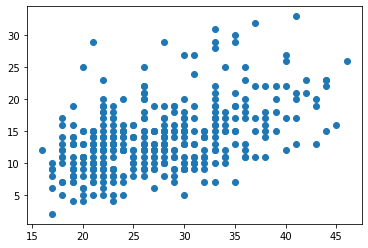

In [110]:
# Plot the count of maternal de novo mutations vs. maternal age
fig, ax = plt.subplots()
ax.scatter(merged_df["Mother_age"], merged_df["mat_dnm"])
plt.show()

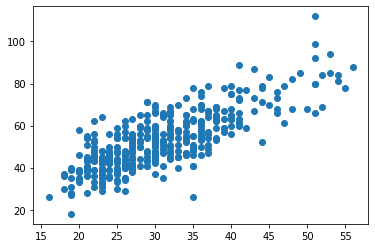

In [111]:
# Plot the count of paternal de novo mutations vs. paternal age
fig, ax = plt.subplots()
ax.scatter(merged_df["Father_age"], merged_df["pat_dnm"])
plt.show()

In [112]:
# Test for an association between maternal age and maternally inherited de novo mutations
model = smf.ols(formula = "mat_dnm ~ Mother_age" , data = merged_df)
#fit the model
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dnm   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        14:08:02   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5040      0.981      3.573      0.000       1.576       5.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value is less than 0.05 so statistically speaking the relationship is significant. The size of the relationship is 0.3776

In [134]:
# Test for an association between paternal age and paternally inherited de novo mutations
model = smf.ols(formula = "pat_dnm ~ Father_age" , data = merged_df)
#fit the model
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pat_dnm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        14:50:45   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.3263      1.702      6.653      0.000       7.979      14.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value is less than 0.05 so statistically speaking the relationship is significant. The size of the relationship is 1.3538

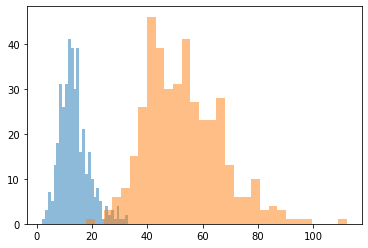

In [119]:
#Plot a histogram of the number of maternal de novo mutations and paternal de novo mutations per proband on a single plot with semi-transparency
fig, ax = plt.subplots()
ax.hist(merged_df["mat_dnm"], bins = 30, alpha = 0.5)
ax.hist(merged_df["pat_dnm"], bins = 30, alpha = 0.5)
plt.show()

In [129]:
#Test whether the number of maternally inherited de novo mutations per proband is significantly different than the number of paternally inherited de novo mutations per proband.
stats.ttest_rel(merged_df["pat_dnm"],
               merged_df["mat_dnm"])


Ttest_relResult(statistic=61.609297634918036, pvalue=1.1245140794573436e-204)

The p-value is very low, close to 0, which indicates that the number of maternally inherited dnms is significantly different than the number of paternally inherited dnms per proband

In [127]:
# Test for an association between maternal age and maternally inherited de novo mutations using poisson
model = smf.poisson(formula = "mat_dnm ~ Mother_age" , data = merged_df)
#fit the model
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 2.911542
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                 0.06729
Time:                        14:39:11   Log-Likelihood:                -1153.0
converged:                       True   LL-Null:                       -1236.1
Covariance Type:            nonrobust   LLR p-value:                 4.640e-38
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8978      0.058     32.608      0.000       1.784       2.012
Mother_age     0.0261      0.002     13.084      0.000       0.022       0.030
==============================================================================
"""

In [128]:
# Test for an association between paternal age and paternally inherited de novo mutations
model = smf.poisson(formula = "pat_dnm ~ Father_age" , data = merged_df)
#fit the model
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 3.574283
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                  0.2247
Time:                        14:39:29   Log-Likelihood:                -1415.4
converged:                       True   LL-Null:                       -1825.7
Covariance Type:            nonrobust   LLR p-value:                1.836e-180
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2230      0.027    119.153      0.000       3.170       3.276
Father_age     0.0237      0.001     29.330      0.000       0.022       0.025
==============================================================================
"""

In [133]:
# Predict the number of paternal de novo mutations for a proband with a father who was 50.5 years old at the proband's time of birth
y = (0.0237*50.5) + 3.2230
prediction = 2.71828**y
prediction

83.08357484048771

The predicted number of peternal de novo mutations for a 50.5 year old father is around 83